<a href="https://colab.research.google.com/github/czokw1/ml-predict-bank-deposit/blob/master/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Project Description

In [1]:
###Abstract: The data is related to marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will take a bank deposit (variable target).

#### Import libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import FeatureUnion
from sklearn import  metrics
from sklearn.model_selection import StratifiedKFold

# models trainng
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier

# models validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


####Load Data

In [3]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DS/Project/data/bank-full.csv',sep=';')

In [4]:
dataset.sample(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
15414,30,management,married,tertiary,no,107,yes,yes,cellular,18,jul,263,1,-1,0,unknown,no
7976,42,admin.,single,tertiary,no,519,yes,no,unknown,2,jun,150,3,-1,0,unknown,no
13873,38,admin.,married,secondary,no,260,yes,no,cellular,10,jul,446,1,-1,0,unknown,no
413,48,admin.,married,secondary,no,182,yes,no,unknown,6,may,180,2,-1,0,unknown,no
24183,32,management,married,tertiary,no,937,no,no,unknown,17,nov,76,1,-1,0,unknown,no
9779,37,blue-collar,married,primary,no,178,yes,yes,unknown,9,jun,72,1,-1,0,unknown,no
42141,62,housemaid,married,secondary,no,2,no,no,cellular,3,nov,322,1,-1,0,unknown,yes
26061,42,blue-collar,married,primary,no,792,yes,yes,cellular,19,nov,611,2,175,12,other,no
45063,75,retired,married,tertiary,no,4912,no,no,telephone,20,oct,238,2,183,5,failure,no
42002,56,management,married,secondary,no,0,no,no,cellular,27,oct,298,1,111,8,other,yes


In [5]:
dataset['y'].replace({'yes':1,'no':0},inplace=True)


In [6]:
dataset.rename({'y':'target'},axis=1, inplace=True)

In [7]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


#Exploratory data analysis

##Checking data type of variables

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  target     45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


##Checking if there are any missing values

In [9]:
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

##Checking descriptive statistics

In [10]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous,target
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


##Unique values per column

In [11]:
for column in dataset.columns:
  print(f'{column} --> {len(dataset[column].unique())}')
  print(f'{dataset[column].unique()}')
  print()

age --> 77
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]

job --> 12
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

marital --> 3
['married' 'single' 'divorced']

education --> 4
['tertiary' 'secondary' 'unknown' 'primary']

default --> 2
['no' 'yes']

balance --> 7168
[ 2143    29     2 ...  8205 14204 16353]

housing --> 2
['yes' 'no']

loan --> 2
['no' 'yes']

contact --> 3
['unknown' 'cellular' 'telephone']

day --> 31
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]

month --> 12
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

duration --> 1573
[ 261  151   76 ... 1298 1246 1556]

campaign --> 48
[ 1  2  3  5  4  6  7  

##Checking correlation between variables

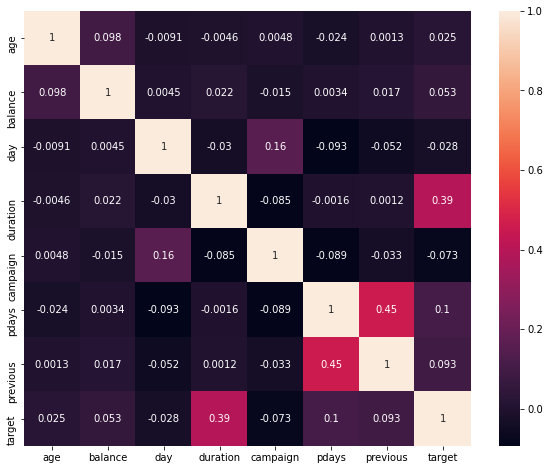

In [12]:
corr = dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True);

##Checking ratio target variable

Target variable

In [13]:
dataset['target'].value_counts()/dataset.shape[0]

0    0.883015
1    0.116985
Name: target, dtype: float64

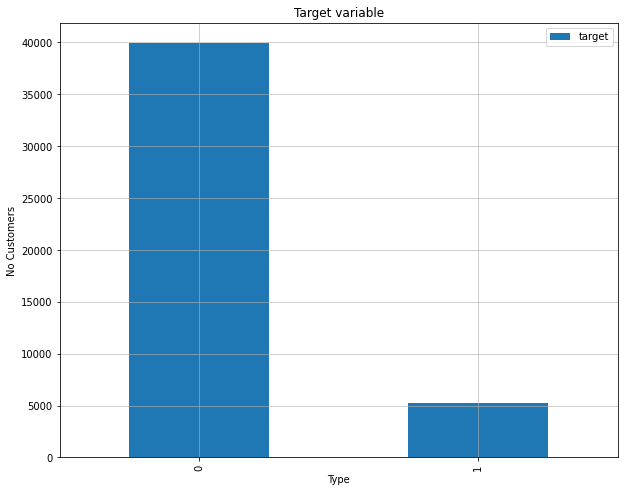

In [14]:
plt.figure(figsize=(10,8))
dataset['target'].value_counts().plot(kind='bar')
plt.title('Target variable')
plt.ylabel('No Customers')
plt.xlabel('Type')
plt.legend()
plt.grid(axis='both', alpha=0.75);

##Checking variables 

 Variables

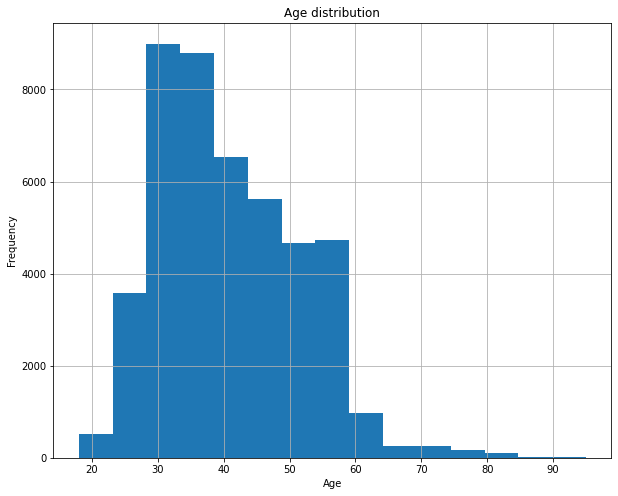

In [15]:
plt.figure(figsize=(10,8))
dataset['age'].hist(bins=15)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age distribution');

###Plotting variables to check thier distribiution

In [16]:
def plot_variables(var):
  order = dataset[var].value_counts().index
  plt.figure(figsize=(10,8))
  sns.countplot(y=var,data=dataset,order=order)
  plt.title(f'{var} distribution'.capitalize())
  plt.xlabel('No Customers'.capitalize())
  plt.ylabel(f'{var} Type'.capitalize());

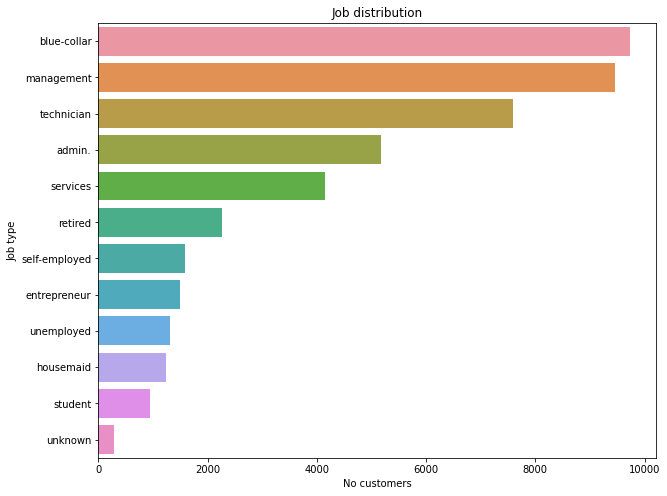

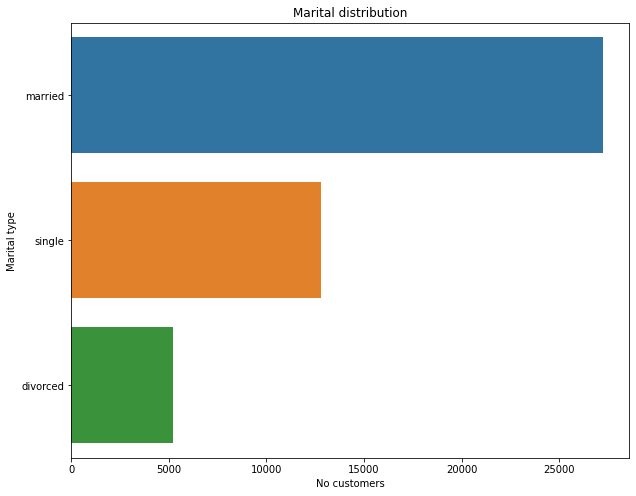

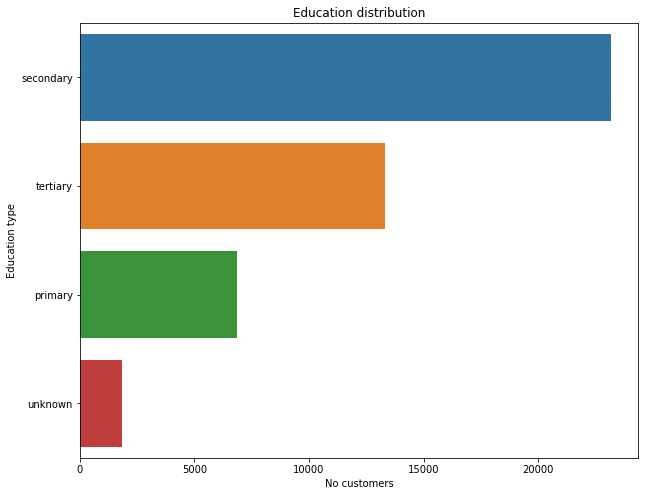

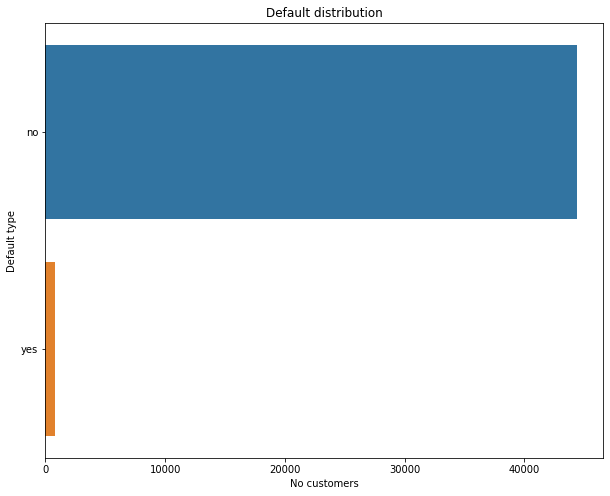

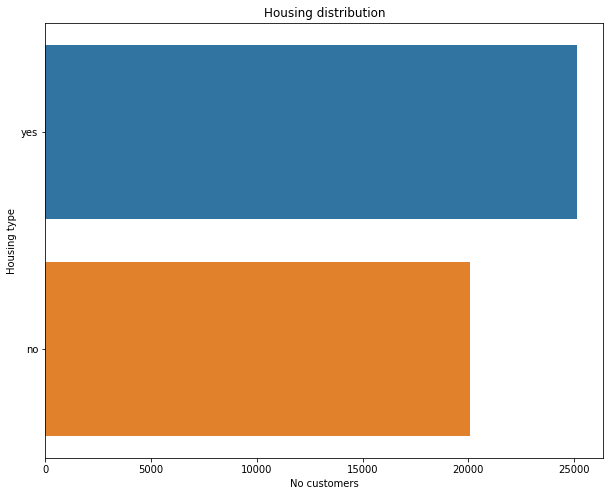

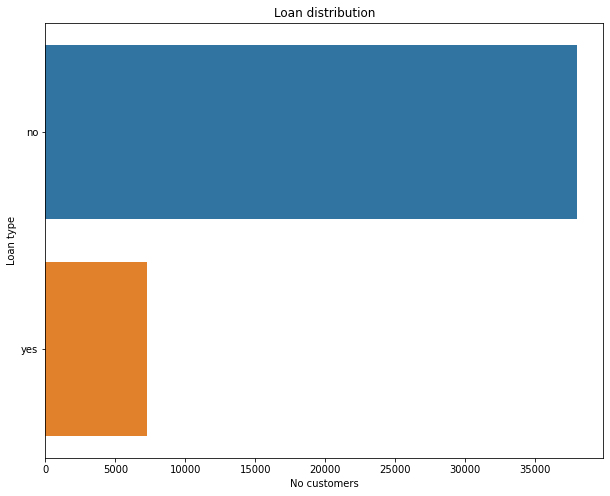

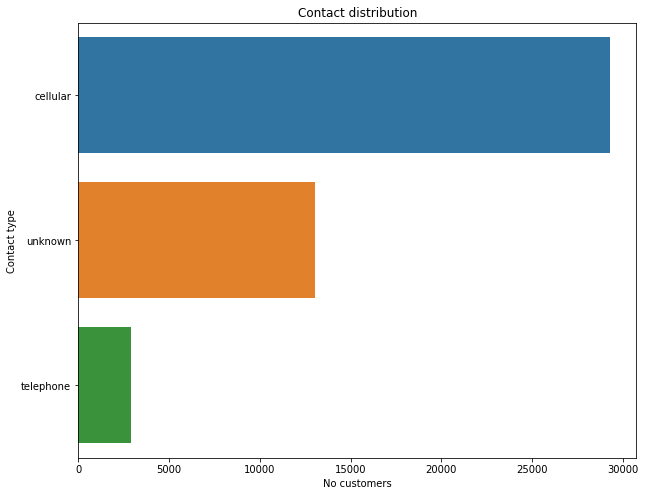

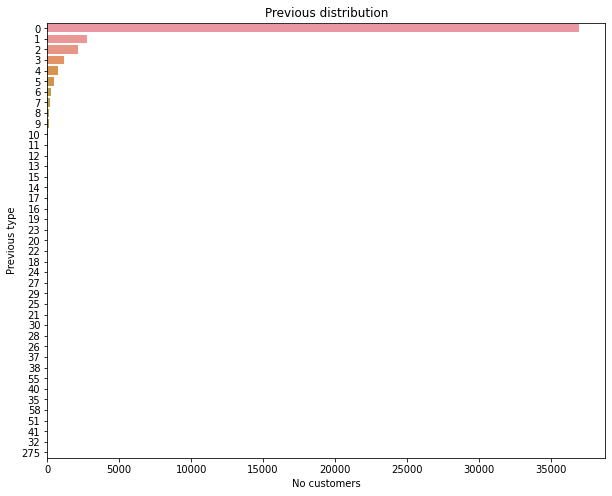

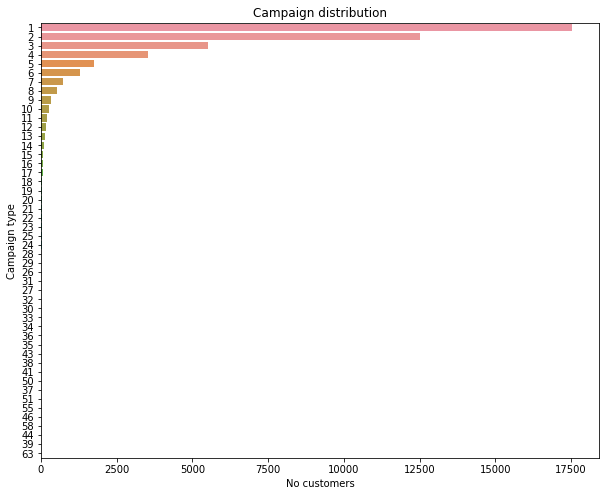

In [17]:
dataset.columns
vars = ['job', 'marital', 'education', 'default', 'housing','loan','contact','previous','campaign']

[plot_variables(var) for var in vars];

###Plotting variables by target

In [18]:
def plot_variablesByTarget(var,target):
  order = dataset[var].value_counts().index
  plt.figure(figsize=(10,8))
  sns.countplot(y=var,hue=target,data=dataset,order=order)
  plt.title(f'{var} distribution divided by target variable'.capitalize())
  plt.xlabel('No Customers'.capitalize())
  plt.ylabel(f'{var} Type'.capitalize());

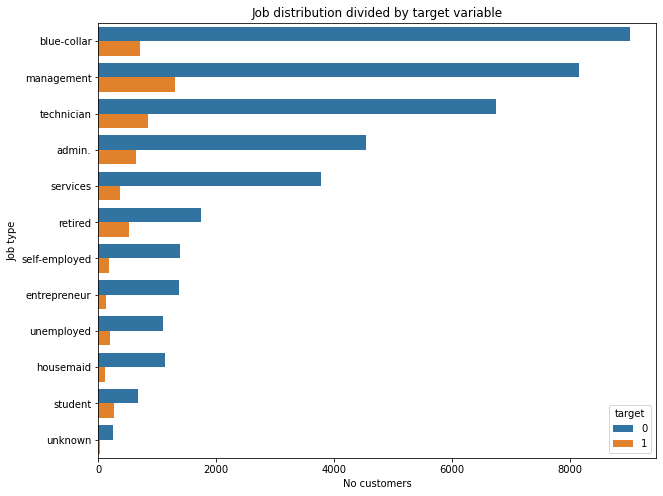

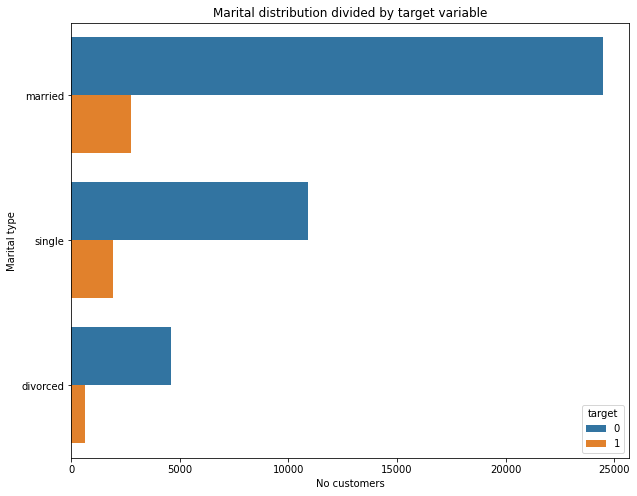

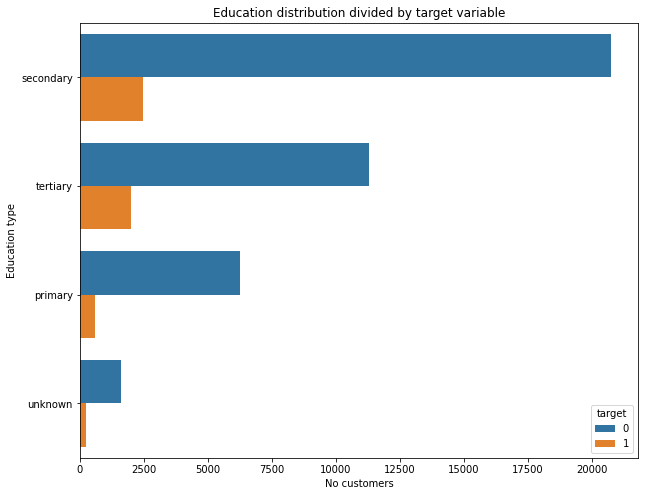

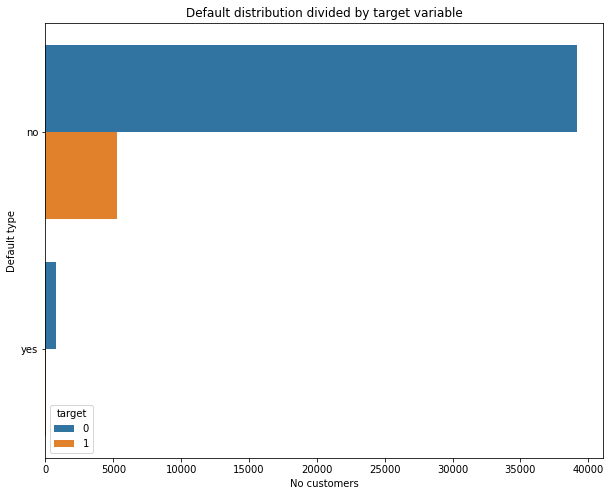

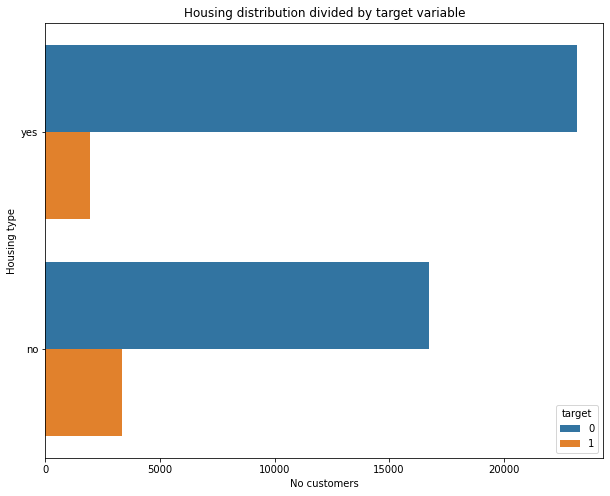

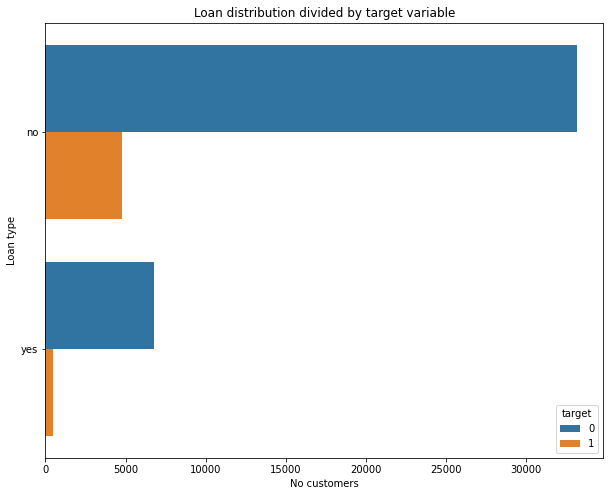

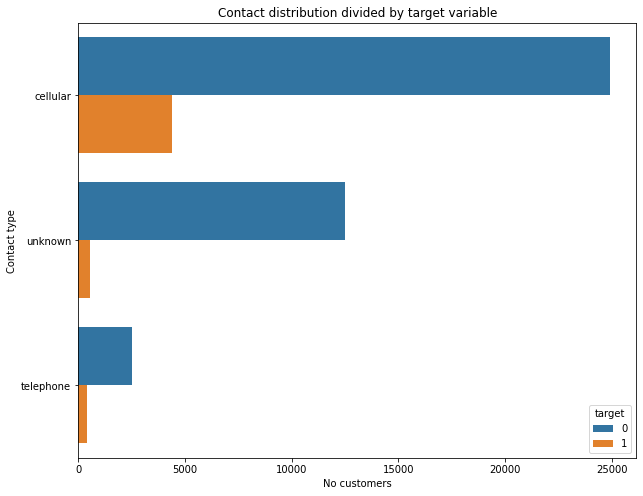

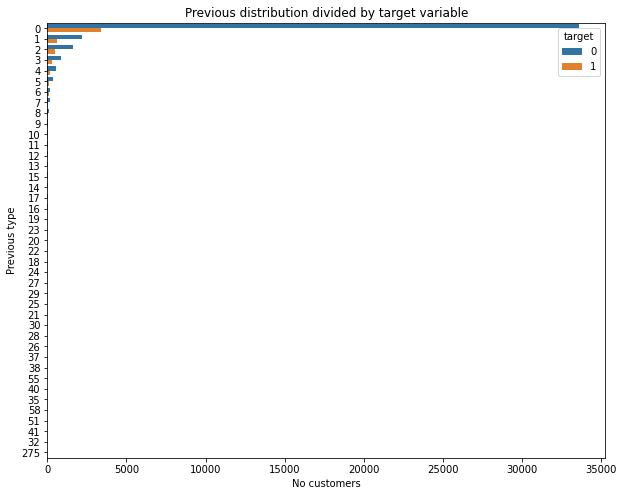

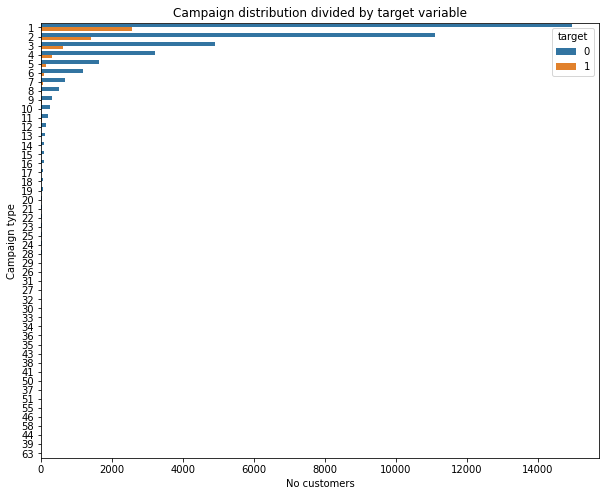

In [19]:
vars = ['job', 'marital', 'education', 'default', 'housing','loan','contact','previous','campaign']

[plot_variablesByTarget(var,'target') for var in vars];

###Checking variables divided by type

In [20]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'target'],
      dtype='object')

Numeric columns

In [21]:
numeric_columns =  dataset.select_dtypes(include=np.number).columns

numeric_columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'target'],
      dtype='object')

Non numeric columns

In [22]:
non_numeric_columns = dataset.select_dtypes(exclude=np.number).columns

non_numeric_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [23]:
def plot_num_variablesByType(): 
  for column in numeric_columns:

    print(f'Column name: {column}')
    print(f'Unique values: {len(dataset[column].unique())}')
    dataset[column].plot.hist(bins=20)
    plt.show()

Plotting numeric columns

Column name: age
Unique values: 77


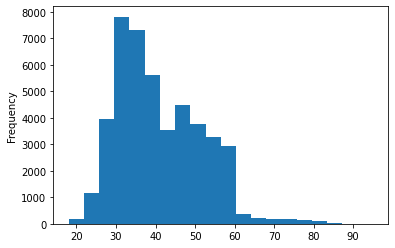

Column name: balance
Unique values: 7168


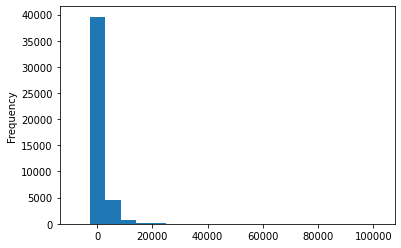

Column name: day
Unique values: 31


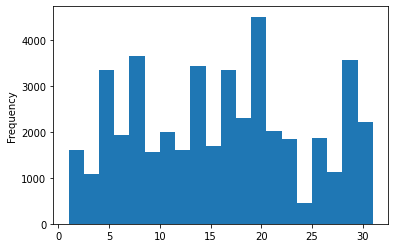

Column name: duration
Unique values: 1573


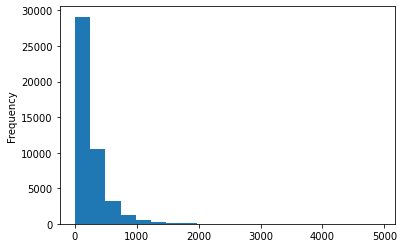

Column name: campaign
Unique values: 48


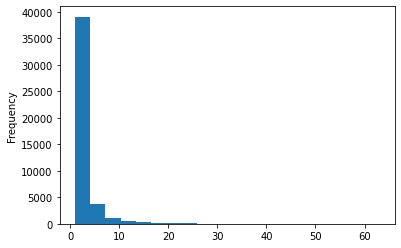

Column name: pdays
Unique values: 559


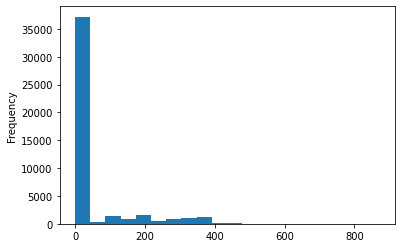

Column name: previous
Unique values: 41


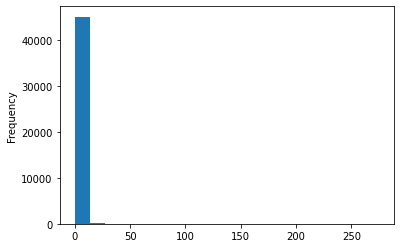

Column name: target
Unique values: 2


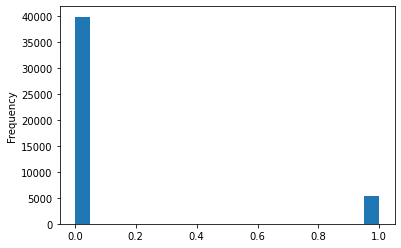

In [24]:
plot_num_variablesByType()

Plotting non numeric columns

In [25]:
def plot_non_num_variablesByType():
  for column in non_numeric_columns:
    print(f'Column name: {column}')
    print(f'Unique values:{len(dataset[column].unique())}')
    dataset[column].value_counts().plot.bar()
    plt.show()

Column name: job
Unique values:12


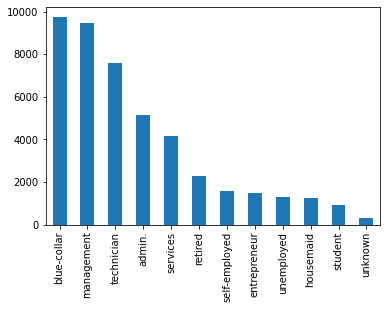

Column name: marital
Unique values:3


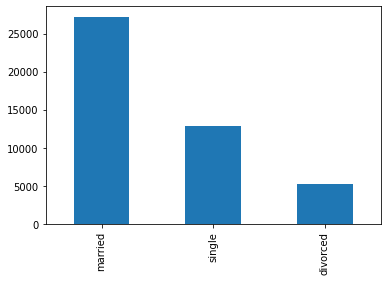

Column name: education
Unique values:4


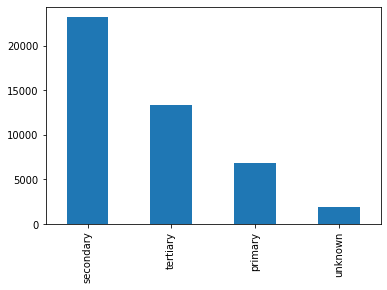

Column name: default
Unique values:2


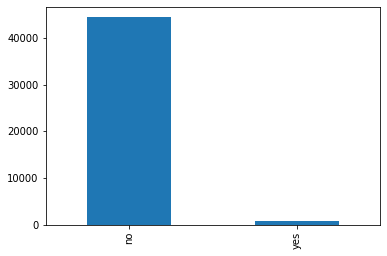

Column name: housing
Unique values:2


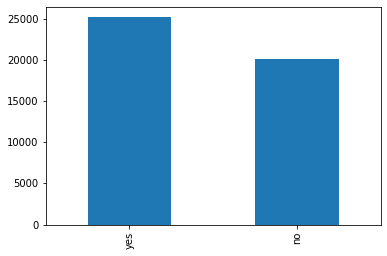

Column name: loan
Unique values:2


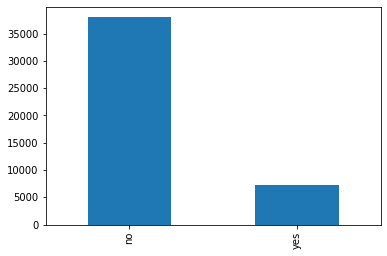

Column name: contact
Unique values:3


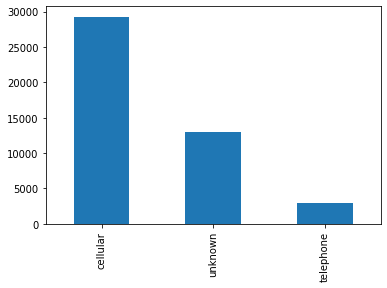

Column name: month
Unique values:12


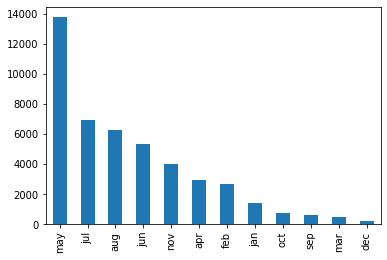

Column name: poutcome
Unique values:4


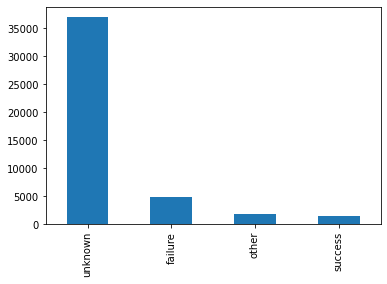

In [26]:
plot_non_num_variablesByType()

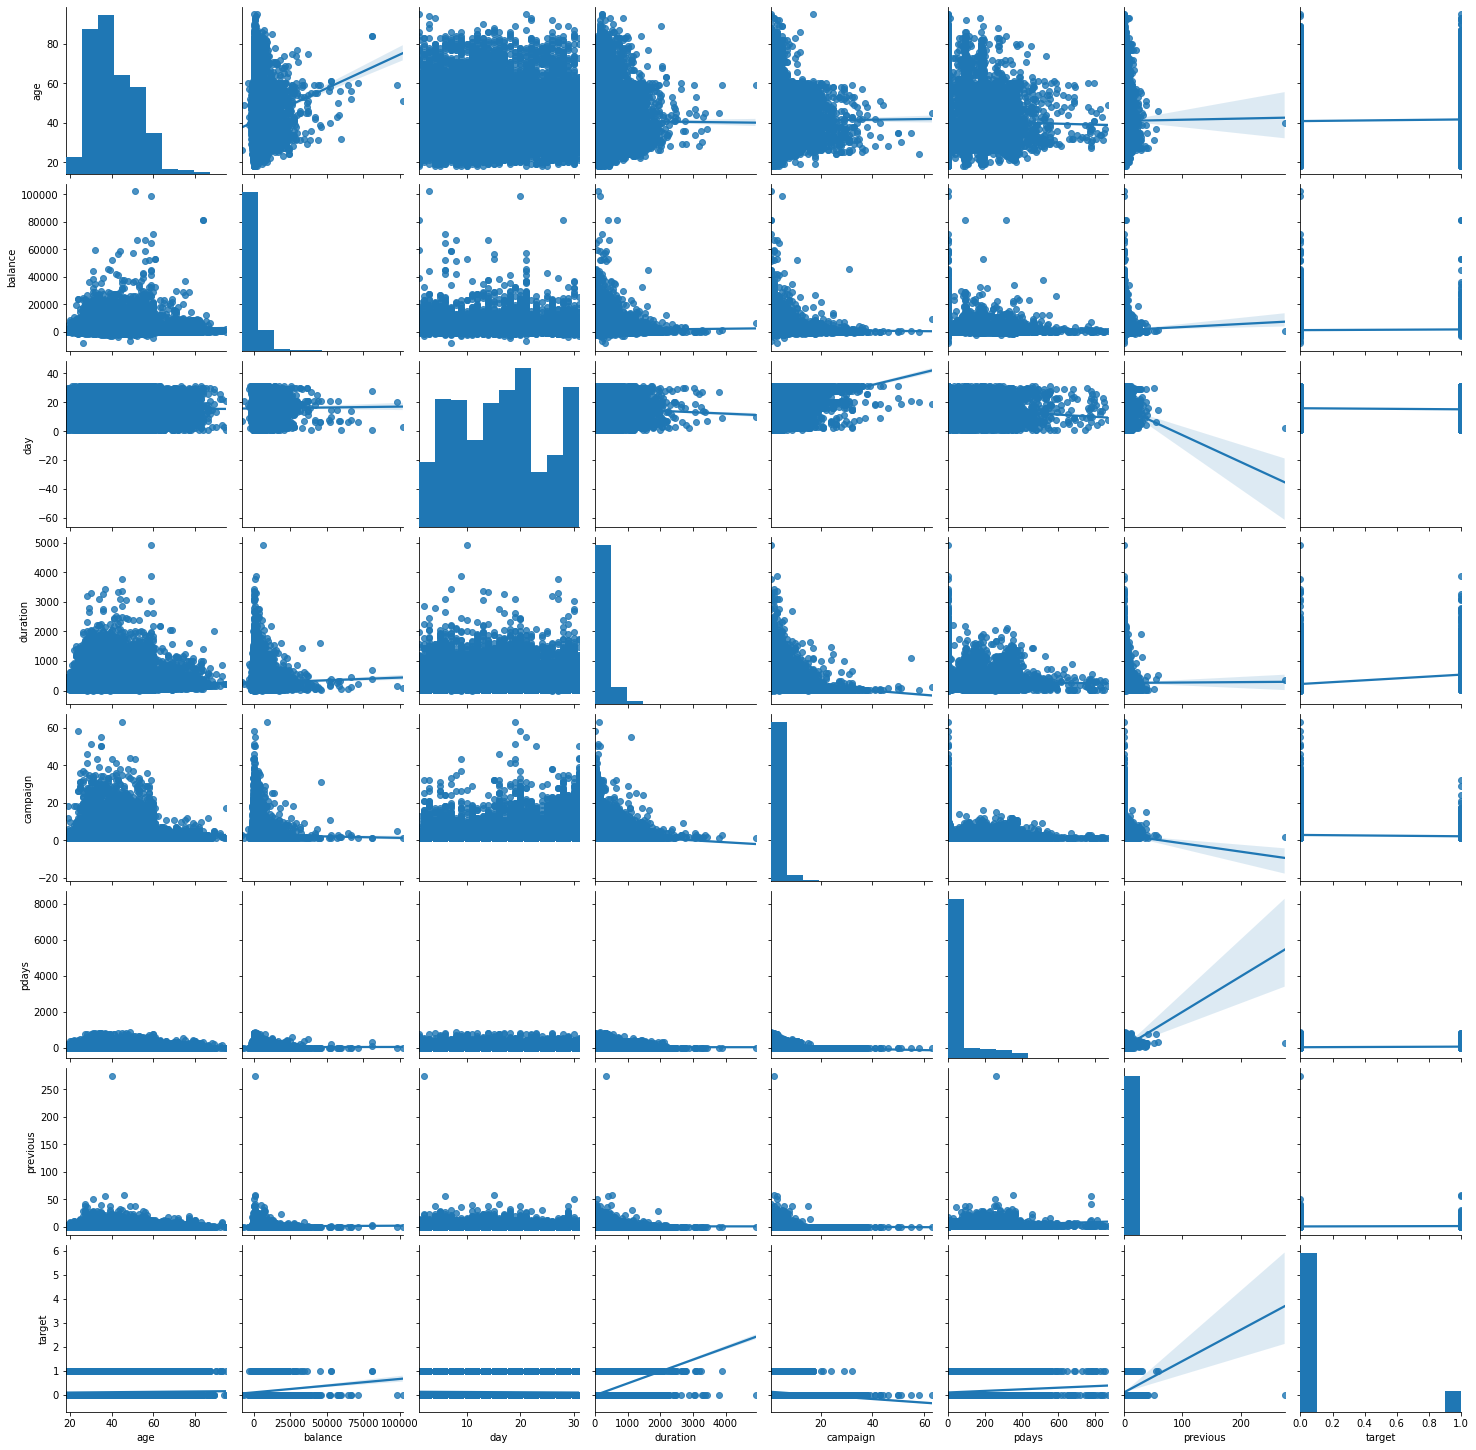

In [27]:
## mutual dependencies

df_numeric = dataset.select_dtypes(include=np.number)

sns.pairplot(data=df_numeric,kind='reg')

plt.show()

#Conclusions:
* binary columns such as loan, housing, default should be turned to 0-1
* categorical columns should be encoded using one-hot encoding
* columns that should be removed: pdays, previous

In [28]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


#Data Preperation

In [29]:
non_numeric_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [30]:
for column in non_numeric_columns:
  print(column)
  print(dataset[column].value_counts())
  print()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

default
no     44396
yes      815
Name: default, dtype: int64

housing
yes    25130
no     20081
Name: housing, dtype: int64

loan
no     37967
yes     7244
Name: loan, dtype: int64

contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

poutcome
unknown    36959
failure

#### Converting categorical attributes into numbers

In [31]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [32]:
dataset['default'].replace({'no':0,'yes':1},inplace=True)

In [33]:
dataset['housing'].replace({'no':0,'yes':1},inplace=True)

In [34]:
dataset['loan'].replace({'no':0,'yes':1},inplace=True)

#### Drop not used columns

In [35]:
dataset.drop([ 'pdays','previous','poutcome'  ],axis=1,inplace=True)

In [36]:
dataset = pd.get_dummies(data=dataset,prefix_sep='_',drop_first=True)

In [37]:
dataset.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'target', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

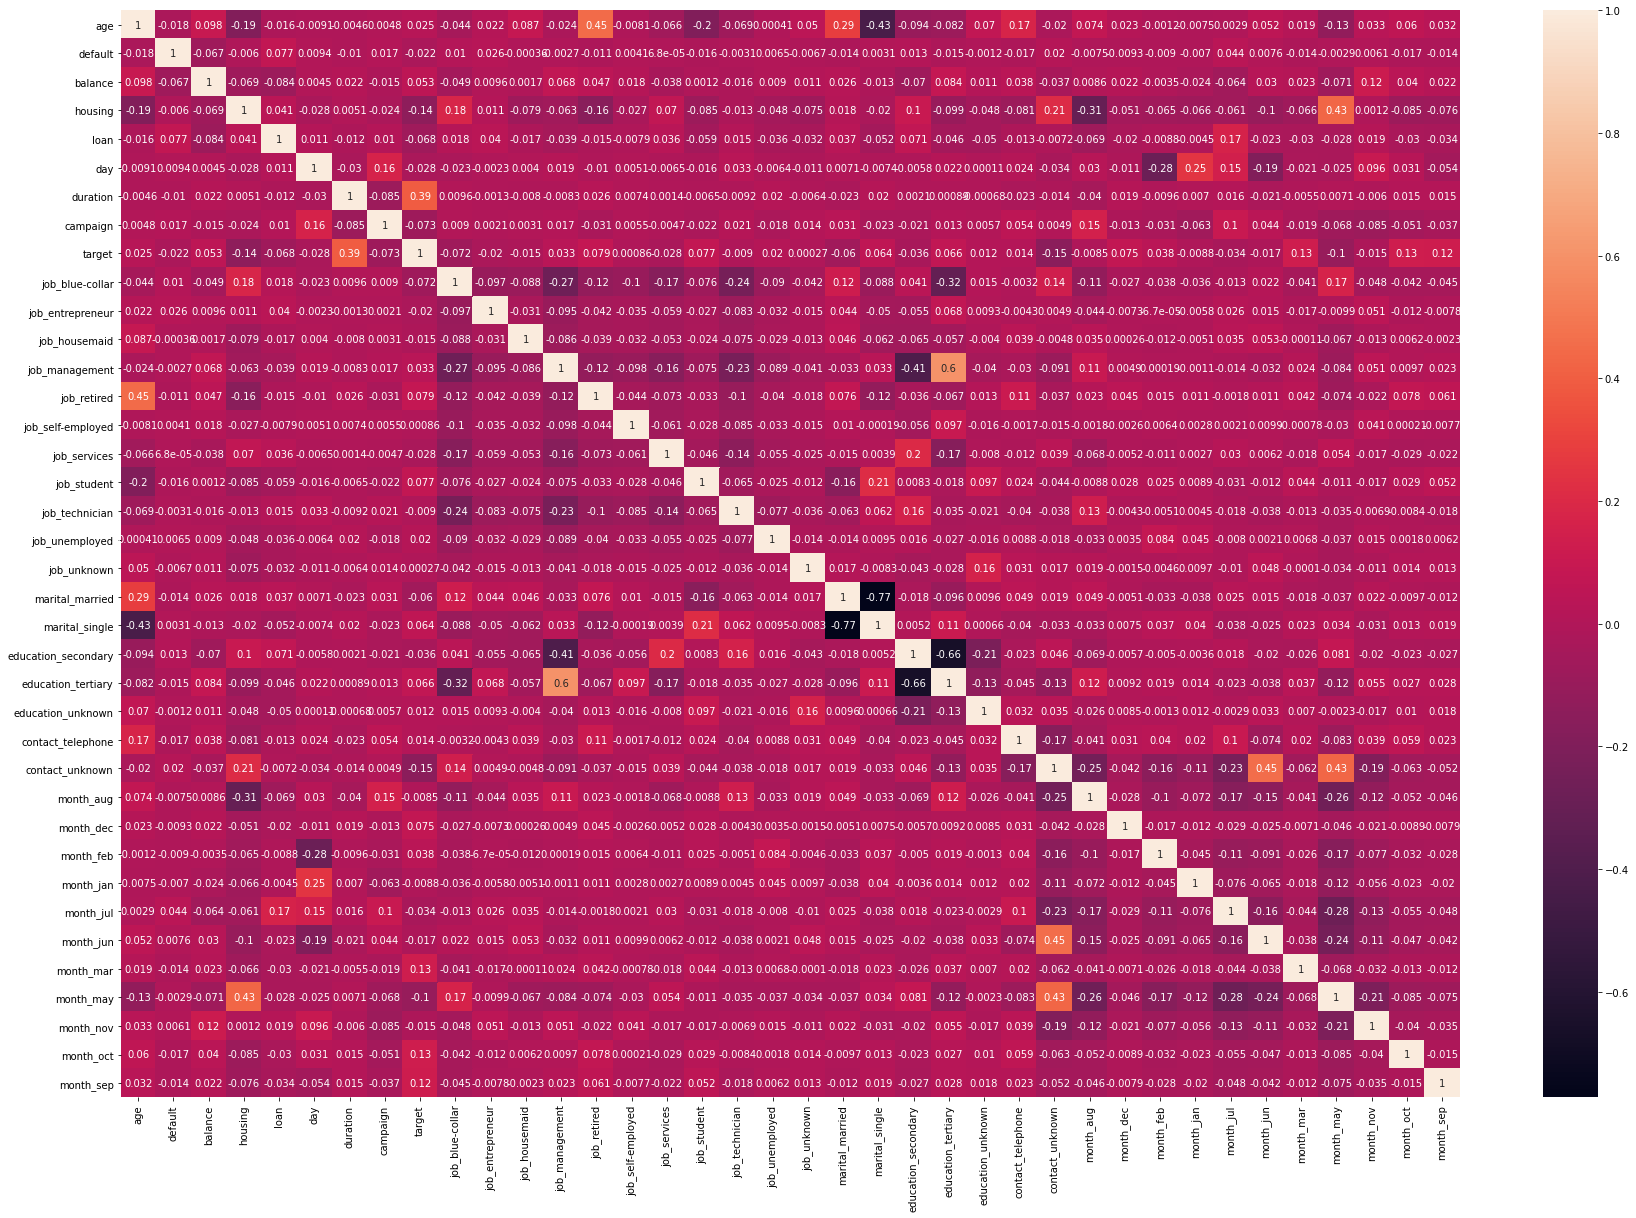

In [38]:
corr = dataset.corr()
plt.figure(figsize=(30,20))
sns.heatmap(data=corr,annot=True)

In [39]:
corr['target'].sort_values(ascending=False)

target                 1.000000
duration               0.394521
month_mar              0.129456
month_oct              0.128531
month_sep              0.123185
job_retired            0.079245
job_student            0.076897
month_dec              0.075164
education_tertiary     0.066448
marital_single         0.063526
balance                0.052838
month_feb              0.038417
job_management         0.032919
age                    0.025155
job_unemployed         0.020390
contact_telephone      0.014042
education_unknown      0.012053
job_self-employed      0.000855
job_unknown            0.000267
month_aug             -0.008536
month_jan             -0.008783
job_technician        -0.008970
month_nov             -0.014937
job_housemaid         -0.015195
month_jun             -0.016805
job_entrepreneur      -0.019662
default               -0.022419
job_services          -0.027864
day                   -0.028348
month_jul             -0.034382
education_secondary   -0.036388
marital_

In [40]:
dataset.sample(10)

,age,default,balance,housing,loan,day,duration,campaign,target,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
11756,38,0,933,0,0,20,95,2,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
29546,28,0,2700,0,0,3,337,4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
40472,28,0,643,0,0,3,308,2,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
15459,49,0,201,1,1,18,297,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
28964,53,0,-264,0,1,2,150,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6339,52,0,2001,1,0,27,95,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
37985,29,0,792,1,0,14,374,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9829,45,0,212,0,0,9,63,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0
18695,42,0,5331,0,1,31,135,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
18820,39,0,-328,0,1,31,16,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


#Modeling

In [41]:
# dataset.columns

In [42]:
# target_column = 'target'

# features = dataset.columns[np.where(dataset.columns!=target_column)]

# features

# X = dataset[features].values

# y = dataset[target_column].values



In [43]:
# X.shape,y.shape

In [44]:
# ###Scaling data

# scaler = StandardScaler()

# X_scaled = scaler.fit_transform(X)

 
# X = X_scaled

# X

In [45]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

In [46]:
# LR = LogisticRegression(max_iter=1000)

# rfe = RFE(LR,n_features_to_select=10)

# rfe_fit =  rfe.fit(X,y)

In [47]:
# #No of selected features / selected features

# print(f'No. selected features : {rfe_fit.n_features_}')

# print(f'Selected features : {rfe_fit.support_}')

# print(f'Feature Names: {np.array(features)[rfe_fit.support_]}')

In [48]:
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(random_state=123,n_jobs=-1)

# clf_model = clf.fit(X,y)


In [49]:
# importances = clf_model.feature_importances_

# importances

In [50]:
# indicies = np.argsort(importances)[::-1]

# f_names = [dataset.columns[i] for i in indicies]

# plt.figure(figsize=(15,8))

# plt.title('Feature Importance')

# plt.bar(range(X.shape[1]), importances[indicies])

# plt.xticks(range(X.shape[1]), f_names, rotation=90)

# plt.show()

In [51]:
# dataset['target'].value_counts()/dataset.shape[0]

#Scenario 1

In [52]:
features = dataset.columns
features= features.drop('target').tolist()
features

['age',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'duration',
 'campaign',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep']

In [53]:
dataset[features][:10]

,age,default,balance,housing,loan,day,duration,campaign,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
5,35,0,231,1,0,5,139,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
6,28,0,447,1,1,5,217,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
7,42,1,2,1,0,5,380,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
8,58,0,121,1,0,5,50,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
9,43,0,593,1,0,5,55,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [54]:
### Var selected
#features = ['duration','balance','age','day','campaign','contact_telephone','housing']

#features = ['housing' ,'loan' ,'duration' ,'campaign', 'contact_unknown' ,'month_aug','month_jan' ,'month_jul' ,'month_may' ,'month_nov']

X = dataset[features]
#X = dataset[['duration','balance']]
X = np.array(X)

y = np.array(dataset['target'])


In [55]:
# ### Scaling
# scaler = StandardScaler()

# X_scaled = scaler.fit_transform(X)

 
# X = X_scaled

# X

In [56]:
### Train Test Split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=123)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (31647, 37) (31647,)
Test set: (13564, 37) (13564,)


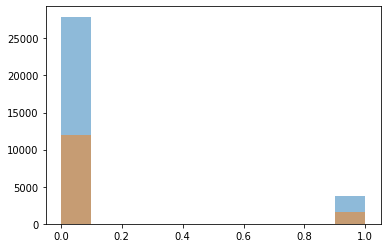

In [57]:
plt.hist(y_train, alpha=0.5)
plt.hist(y_test,alpha=0.5);

In [58]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed,shuffle=True)

###Logistic Regression

In [59]:


pipe= Pipeline([('preprocessing', StandardScaler()),  ('classifier', LogisticRegression(C=1,max_iter=1000))])

param_grid = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid.fit(X_train, y_train)
grid.best_params_

{'classifier__C': 10}

###LinearSVC

In [60]:
from  warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


In [61]:

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

pipe_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])
#pipe_2 = Pipeline([('preprocessing', preprocess_pipeline), ('classifier', LinearSVC(C=1))])
param_grid_2 = {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 1}

### DecisionTree

In [62]:
from sklearn.tree import DecisionTreeClassifier

pipe_3 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [5,9,10,11,20,30],
            'classifier__min_samples_split': [2,3,5,10,20,30,40],
            'classifier__max_leaf_nodes': [3,4,10,14,15,16,20,30,40]
}


grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 40,
 'classifier__min_samples_split': 2,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

### RandomForest

In [67]:
from sklearn.ensemble import RandomForestClassifier

pipe_4 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_4 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 10}

### BaggingClassifier

In [72]:
from sklearn.ensemble import BaggingClassifier

pipe_5 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_5 = {'classifier__n_estimators': [10,50,100],
              'classifier__max_samples': [10,20]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_samples': 20, 'classifier__n_estimators': 50}

### AdaBoostClassifier

In [73]:
from sklearn.ensemble import AdaBoostClassifier

pipe_6 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', AdaBoostClassifier(
                        DecisionTreeClassifier(max_depth=1), 
                        n_estimators=1, learning_rate=0.5, 
                        algorithm="SAMME.R", random_state=42)
                   )
                  ])


param_grid_6 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1],
              'classifier__base_estimator__max_depth':[1,5,7,10]
             }

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__base_estimator__max_depth': 5,
 'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 200}

### ExtraTrees

In [74]:

from sklearn.ensemble import ExtraTreesClassifier

pipe_7 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_7 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_7 = GridSearchCV(pipe_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 10}

### GradientBoosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

pipe_8 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', GradientBoostingClassifier(
                       n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_8 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_8 = GridSearchCV(pipe_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}

### XGBoost

In [76]:
import xgboost

pipe_9 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', xgboost.XGBClassifier(n_estimators=1, 
                      learning_rate=0.5, 
                      random_state=42))
                  ])


param_grid_9 = {'classifier__n_estimators': [50, 100, 200],
              'classifier__learning_rate': [0.1, 0.2,0.5,0.9, 1]
             }

grid_9 = GridSearchCV(pipe_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

{'classifier__learning_rate': 0.5, 'classifier__n_estimators': 100}

In [78]:
from sklearn import  metrics

models = []

models.append(('LogisticRegression', grid.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('DecisionTree', grid_3.best_estimator_))
models.append(('RandomForest', grid_4.best_estimator_))
models.append(('BaggingClassifier', grid_5.best_estimator_))
models.append(('AdaBoost', grid_6.best_estimator_))
models.append(('ExtraTrees', grid_7.best_estimator_))
models.append(('GradientBoosting', grid_8.best_estimator_))
models.append(('XGBoost', grid_9.best_estimator_))



precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))
    elif (name == 'Vo hard'):
        pass
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))
    elif (name == 'Vo hard'):
        roc_auc_score.append(0)
    else:
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))
    print()

LogisticRegression
precision_score: 0.5973451327433629
recall_score: 0.25862068965517243
f1_score: 0.3609625668449198
accuracy_score: 0.8942789737540549
roc_auc_score: 0.8871267816666762

SVM linear
precision_score: 0.6086175942549371
recall_score: 0.2164750957854406
f1_score: 0.31935939707960437
accuracy_score: 0.8934680035387791
roc_auc_score: 0.8901840706954779

DecisionTree
precision_score: 0.5620437956204379
recall_score: 0.3441890166028097
f1_score: 0.42693069306930687
accuracy_score: 0.893320554408729
roc_auc_score: 0.8720110759200608

RandomForest
precision_score: 0.6842105263157895
recall_score: 0.02490421455938697
f1_score: 0.04805914972273567
accuracy_score: 0.8860955470362725
roc_auc_score: 0.8829914074653139

BaggingClassifier
precision_score: 0.6633663366336634
recall_score: 0.042784163473818644
f1_score: 0.08038392321535692
accuracy_score: 0.8869802418165733
roc_auc_score: 0.8075254453860659

AdaBoost
precision_score: 0.5959692898272553
recall_score: 0.39655172413793105


In [79]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['LogisticRegression','SVM linear','DecisionTree','RandomForest','BaggingClassifier','AdaBoost','ExtraTrees','GradientBoosting','XGBoost'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,LogisticRegression,0.597345,0.258621,0.360963,0.894279,0.887127
1,SVM linear,0.608618,0.216475,0.319359,0.893468,0.890184
2,DecisionTree,0.562044,0.344189,0.426931,0.893321,0.872011
3,RandomForest,0.684211,0.024904,0.048059,0.886096,0.882991
4,BaggingClassifier,0.663366,0.042784,0.080384,0.886980,0.807525
5,AdaBoost,0.595969,0.396552,0.476227,0.899292,0.875439
6,ExtraTrees,0.818182,0.011494,0.022670,0.885579,0.834177
7,GradientBoosting,0.616617,0.393359,0.480312,0.901725,0.918418
8,XGBoost,0.587489,0.413793,0.485575,0.898776,0.920544


LogisticRegression
SVM linear
DecisionTree
RandomForest
BaggingClassifier
AdaBoost
ExtraTrees
GradientBoosting
XGBoost


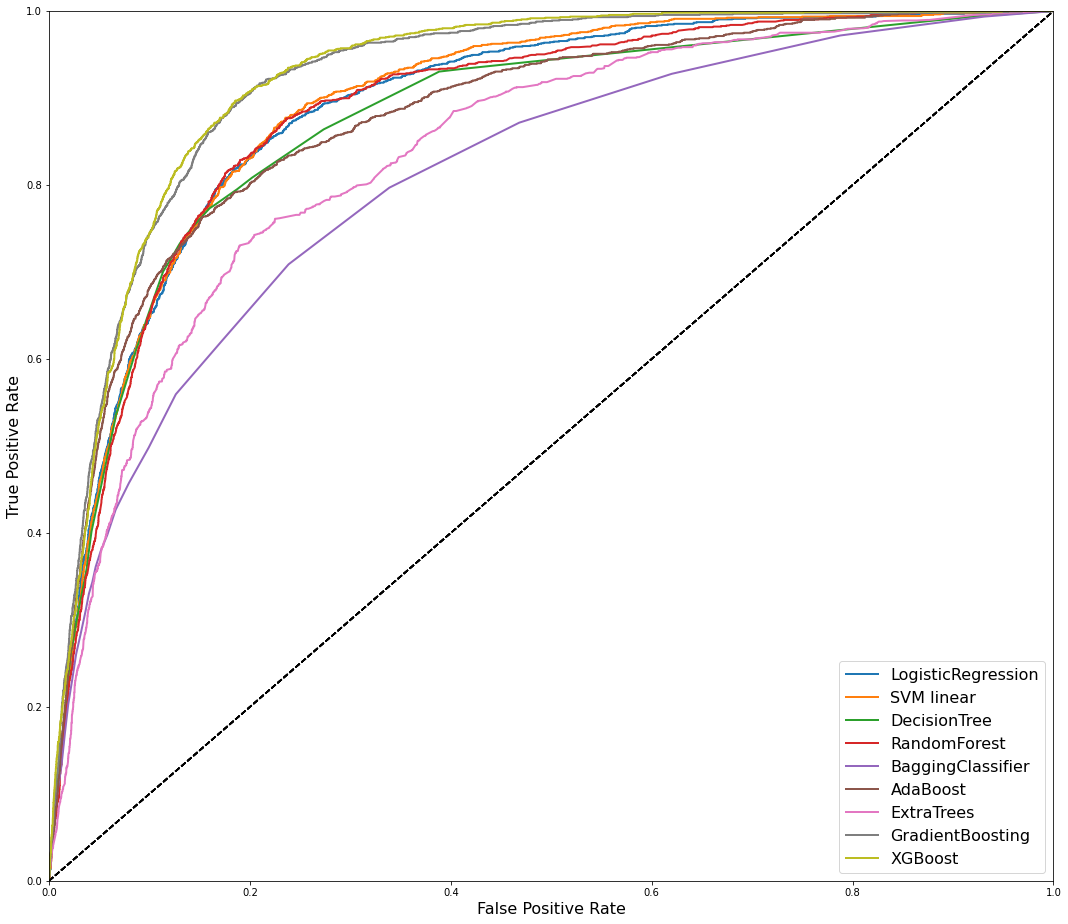

In [82]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(18, 16))
for name, model in models:
    print(name)
    if (name == 'SVM linear'):
        y_scores = model.decision_function(X_test)
    else: 
        y_scores = model.predict_proba(X_test)[:,1]        
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)

plt.legend(loc="lower right", fontsize=16)
plt.show()